<br>
<img src="logoMoSEF.jpeg" width=90px align="left">
<div align="right">Enseignant : Rania Kaffel</div>
<div align="right">Réalisé par : Gaoussou DIAKITE et Eunice KOFFI</div>
<div align="right">Année : 2022/2023</div><br><br><br>
<div align="center"><span style="font-family:Lucida Caligraphy;font-size:32px;color:darkgreen">Master 2 Modélistaion Statistiques Economiques et Financières</span></div><br>
<div align="center"><span style="font-family:Lucida Caligraphy;font-size:28px;color:#e60000">Projet Finance Quantitative</span></div><br><br>
<hr>

<br>

<div align="center"><span style="font-family:Lucida Caligraphy;font-size:32px;color:darkgreen">Partie 4.1: « D » Portfolio construction and monitoring: Arbre CART </span></div><br>
<hr>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Chargement des données
data = pd.read_excel(r'data/data.xlsx')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Titres                     38 non-null     object 
 1   ESG_DISCLOSURE_SCORE       38 non-null     float64
 2   ENVIRON_DISCLOSURE_SCORE   38 non-null     float64
 3   SOCIAL_DISCLOSURE_SCORE    38 non-null     float64
 4   TOTAL_WATER_USE            27 non-null     float64
 5   rentabilite_moyenne        38 non-null     float64
 6   volatilite                 38 non-null     float64
 7   valeur_moyenne_entreprise  38 non-null     float64
 8   Ratio_sharpe               38 non-null     float64
 9   ratio_index                38 non-null     float64
 10  target                     38 non-null     int64  
 11  type                       38 non-null     object 
dtypes: float64(9), int64(1), object(2)
memory usage: 3.7+ KB


In [3]:
# On supprime les variables dont on a pas besoin
data_ = data[['ESG_DISCLOSURE_SCORE', 'rentabilite_moyenne', 'volatilite', 'valeur_moyenne_entreprise', 'target']]

In [4]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ESG_DISCLOSURE_SCORE       38 non-null     float64
 1   rentabilite_moyenne        38 non-null     float64
 2   volatilite                 38 non-null     float64
 3   valeur_moyenne_entreprise  38 non-null     float64
 4   target                     38 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 1.6 KB


In [5]:
data_.target.value_counts()

1    22
0    16
Name: target, dtype: int64

# Algorithme CART Sur l'ensemble des données 

In [6]:
# Séparation des données en entrées et sorties
X = data_.iloc[:, :-1]
y = data_.iloc[:, -1]

#X = pd.get_dummies(X)


# Entraînement de l'algorithme de classification CART
classifier = DecisionTreeClassifier(criterion='gini', random_state=0)
classifier.fit(X, y)

DecisionTreeClassifier(random_state=0)

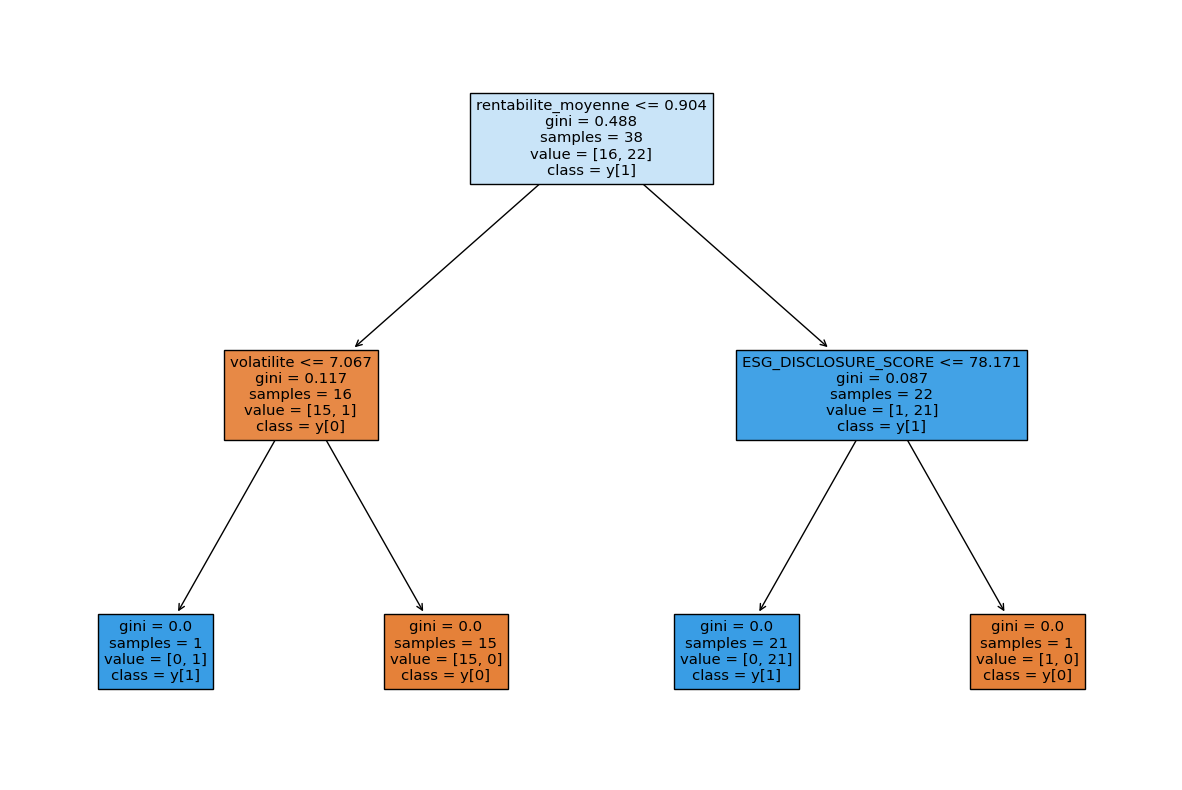

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plot_tree(classifier, feature_names=X.columns, class_names=True, filled=True)
plt.show()

In [ ]:
# Séléction de nos actions en fonction du résultat de l'arbre de décision

In [9]:
selected_stocks = data[data['rentabilite_moyenne'] >0.904]

In [10]:
selected_stocks

,Titres,ESG_DISCLOSURE_SCORE,ENVIRON_DISCLOSURE_SCORE,SOCIAL_DISCLOSURE_SCORE,TOTAL_WATER_USE,rentabilite_moyenne,volatilite,valeur_moyenne_entreprise,Ratio_sharpe,ratio_index,target,type
3,UPM FH Equity,67.417765,62.035639,50.272068,4.140000e+05,0.933991,7.545553,18205.290910,0.119009,0.095565,1,Basic Materials
4,XOM US Equity,65.335479,50.015101,52.841596,4.400000e+05,0.992708,9.524520,339098.595281,0.100447,0.095565,1,Energy
5,VLO US Equity,54.079066,21.292661,47.067715,NaN,1.916323,14.380837,43771.752295,0.130752,0.095565,1,Energy
7,FCX US Equity,73.704859,76.472365,47.037485,1.622350e+06,2.257247,14.806710,44449.624805,0.150016,0.095565,1,Basic Materials
9,ADM US Equity,56.161352,44.759891,29.836759,1.148000e+05,1.530795,6.640502,38511.134790,0.225103,0.095565,1,"Consumer, Non-cyclical"
11,TECK/B CT Equity,72.849814,63.394745,57.557437,3.948860e+05,1.465628,11.947684,16872.533429,0.119657,0.095565,1,Basic Materials
12,RIO US Equity,72.457499,69.102990,56.952842,1.390000e+06,1.327506,7.598793,0.000000,0.169962,0.095565,1,Basic Materials
15,AAL LN Equity,65.003521,52.884325,51.481258,7.603350e+05,1.924395,10.515054,0.000000,0.179590,0.095565,1,Basic Materials
17,GLEN LN Equity,75.837441,72.153428,64.752116,1.570000e+06,1.216200,11.131331,54194.188500,0.106025,0.095565,1,Basic Materials
18,MPC US Equity,71.521980,67.411658,54.020556,1.679470e+05,2.268121,13.617243,65018.734981,0.163919,0.095565,1,Energy


In [11]:
# On récupère les noms des actions qu'on a séléctionné
var=selected_stocks['Titres'].to_list()

In [12]:
# on rajoute la date dans la base de donnée
var.append('Date_2')

In [13]:
#Cette variable n'existe pas dans la base de données data, je veux savoir pourquoi. Car elle me paraît très importante 
var.remove('CTVA US Equity')

In [14]:
# Lecture de la base de données Returns, pour selectionner nos titres 
table = pd.read_csv('Data_clean/Returns_clean_portfolio.csv')


In [15]:
table.columns

Index(['Date_2', 'BP/ LN Equity', 'STERV FH Equity', 'IP US Equity',
       'UPM FH Equity', 'NEM US Equity', 'XOM US Equity', 'VLO US Equity',
       'NUE US Equity', 'ABX CT Equity', 'FMC US Equity', 'FCX US Equity',
       'TTE FP Equity', 'COP US Equity', 'ADM US Equity', 'PKX US Equity',
       'BHP US Equity', 'TECK/B CT Equity', 'RIO US Equity', 'WIL SP Equity',
       'MNDI LN Equity', 'AAL LN Equity', 'CVE CT Equity', 'ALA CT Equity',
       'WLK US Equity', 'GLEN LN Equity', 'MOS US Equity', 'MPC US Equity',
       'PSX US Equity', 'WY US Equity', 'ET US Equity', 'VNOM UW Equity',
       'SUN US Equity', 'WRK US Equity', 'PBA US Equity', 'AA US Equity',
       'MTS SQ Equity', 'NTR CT Equity', 'NTR US Equity', 'OXY US Equity',
       'OKE US Equity', 'CVX US Equity', 'PXD US Equity', 'TRGP US Equity',
       'SLB US Equity', 'BKR US Equity', 'DVN US Equity', 'HES US Equity',
       'MRO US Equity', 'WMB US Equity', 'CTRA US Equity', 'APA US Equity',
       'EOG US Equity', 'K

In [16]:
# On selectionne les stocks pour construire notre portefeuille 
Data_portfolio = table[var]

In [18]:
#On  met la date en index
stock_return = Data_portfolio.drop("Date_2", axis=1)
stock_return = stock_return.dropna()
stock_return.index = pd.to_datetime(Data_portfolio["Date_2"])


# Construction du portefeuille équipondéré 

In [20]:

import numpy as np

#poids 
w = 1/21
stock_weight = np.array([w] * 21)

ptf_equi = (stock_return * stock_weight).sum(axis=1)


# Calcule du rendement, volatilité et ratio de sharpe de notre portefeuille équipondéré


In [23]:
import pandas as pd
import numpy as np

def stat_desc(returns, rf):
    stats = np.cumsum(returns).iloc[-1,]
    stats = np.append(stats, np.std(returns))
    stats = np.append(stats, (np.mean(returns - rf) / np.std(returns)))
    stats = pd.DataFrame(stats, index=["Cumulative Return", "Volatility", "Sharpe Ratio"])
    return stats.T

results_Q7 = stat_desc(ptf_equi, rf=0.036)

In [24]:
#résultat de notre portefeuille équipondéré 
results_Q7

,Cumulative Return,Volatility,Sharpe Ratio
0,108.016091,10.030899,0.175883


# Rendement, Volatilité et Ratio de Sharpe de SP500

In [25]:
SP500=table[['Date_2','S5ENRS Index']]

In [26]:
stock_SP500 = SP500.drop("Date_2", axis=1)
stock_SP500 = stock_SP500.dropna()
stock_SP500.index = pd.to_datetime(SP500["Date_2"])

In [27]:
def stat_desc(returns, rf):
    stats = np.cumsum(returns).iloc[-1,]
    stats = np.append(stats, np.std(returns))
    stats = np.append(stats, (np.mean(returns - rf) / np.std(returns)))
    stats = pd.DataFrame(stats, index=["Cumulative Return", "Volatility", "Sharpe Ratio"])
    return stats.T

results_SP500 = stat_desc(stock_SP500, rf=0.036)
results_SP500

C:\Users\gadiakite\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,Cumulative Return,Volatility,Sharpe Ratio
0,62.773752,10.482659,0.096371


# Descriptif du portefeuille

In [27]:
portfolio_stat = Data_portfolio.describe()
portfolio_stat.T

,count,mean,std,min,25%,50%,75%,max
UPM FH Equity,60.0,0.933991,7.545553,-18.17581,-3.391470,1.360282,6.047841,16.86093
XOM US Equity,60.0,0.992708,9.524520,-26.18585,-4.474271,1.752606,5.669578,24.13793
VLO US Equity,60.0,1.916323,14.380837,-31.53208,-7.380648,2.168741,9.631668,41.78483
FCX US Equity,60.0,2.257247,14.806710,-32.22892,-6.552729,1.161181,11.886195,36.20690
ADM US Equity,60.0,1.530795,6.640502,-15.22080,-2.060386,1.682716,6.519455,15.05417
TECK/B CT Equity,60.0,1.465628,11.947684,-26.15643,-5.379310,1.485447,11.322245,21.11710
RIO US Equity,60.0,1.327506,7.598793,-16.93900,-3.458350,1.581724,6.643353,16.73522
AAL LN Equity,60.0,1.924395,10.515054,-27.09281,-5.163959,1.627077,10.100153,26.09288
GLEN LN Equity,60.0,1.216200,11.131331,-37.76344,-5.351308,0.235152,7.598809,40.20381
MPC US Equity,60.0,2.268121,13.617243,-50.18979,-5.670125,3.250091,9.448904,35.81710


# Corrélation de nos actions 

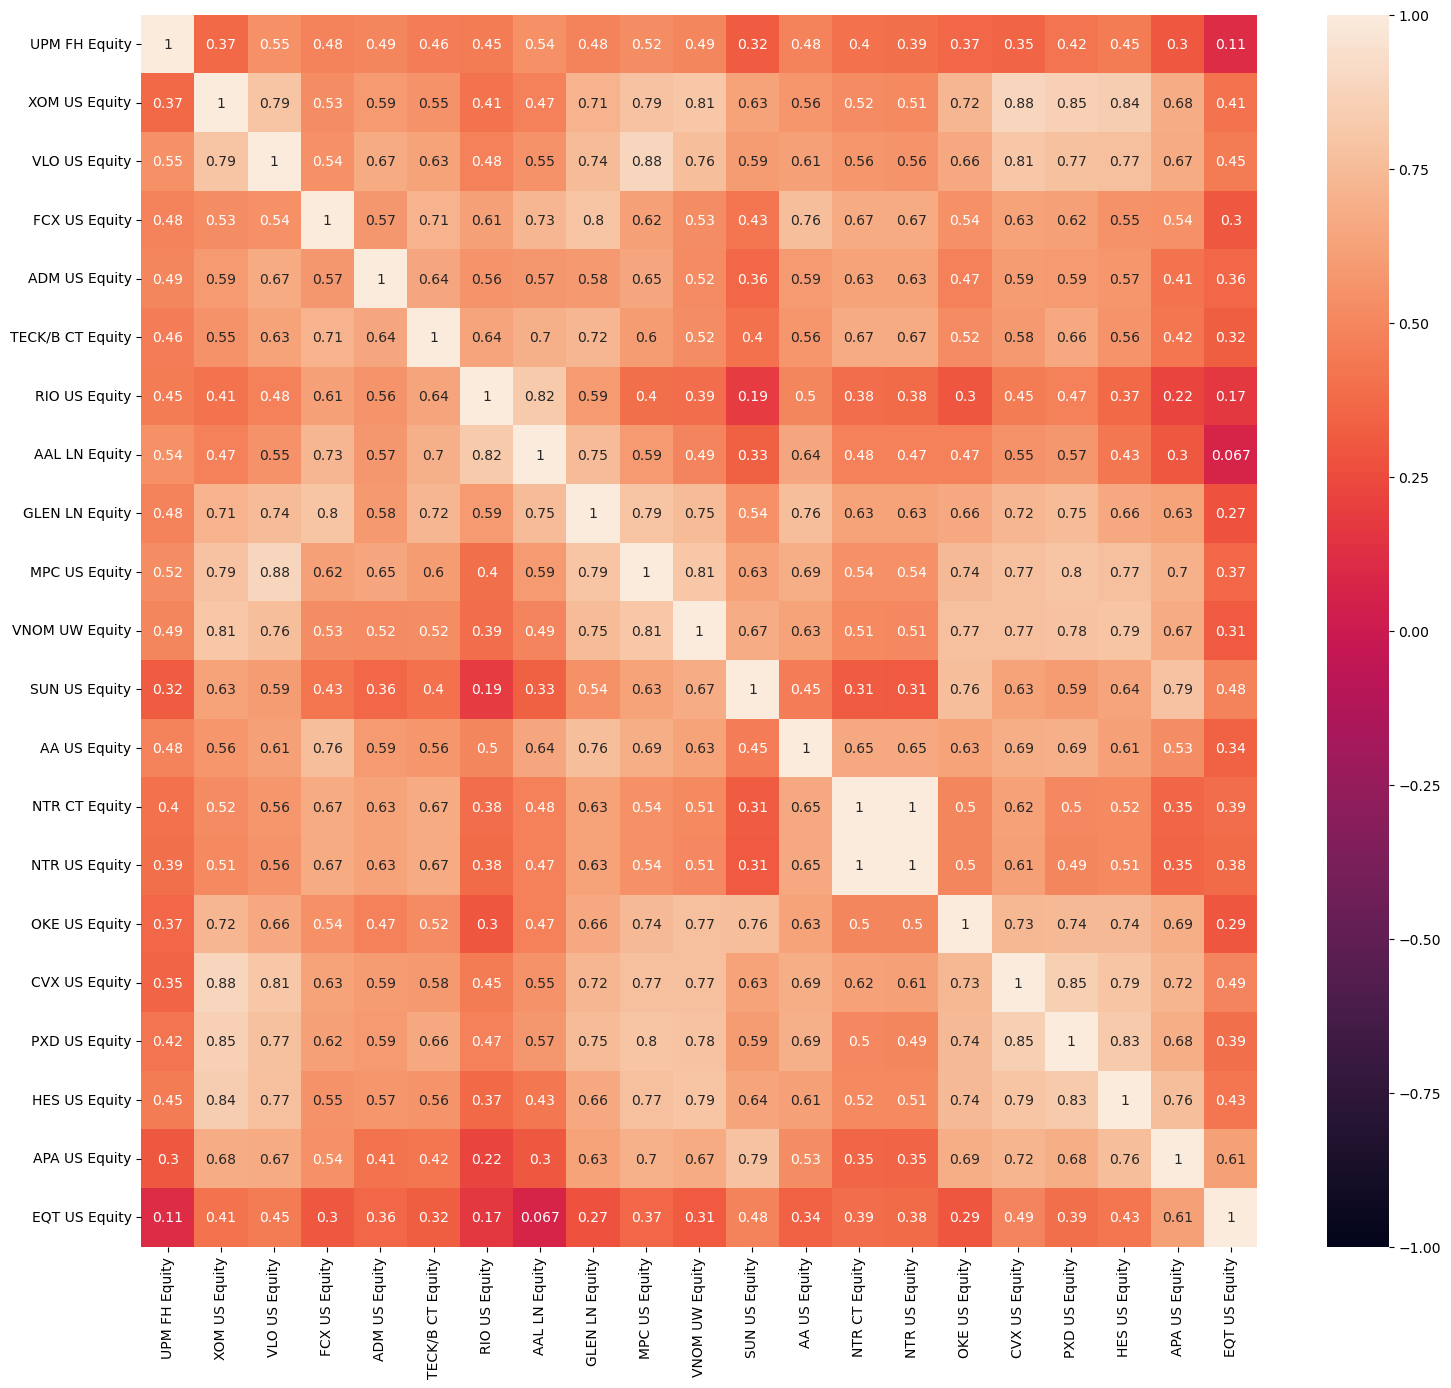

In [28]:
import seaborn as sns
plt.figure(figsize = (18, 16))
sns.heatmap(Data_portfolio.corr(), annot=True, vmin=-1,vmax=1)
plt.show()

In [29]:
Data_portfolio.columns

Index(['UPM FH Equity', 'XOM US Equity', 'VLO US Equity', 'FCX US Equity',
       'ADM US Equity', 'TECK/B CT Equity', 'RIO US Equity', 'AAL LN Equity',
       'GLEN LN Equity', 'MPC US Equity', 'VNOM UW Equity', 'SUN US Equity',
       'AA US Equity', 'NTR CT Equity', 'NTR US Equity', 'OKE US Equity',
       'CVX US Equity', 'PXD US Equity', 'HES US Equity', 'APA US Equity',
       'EQT US Equity', 'Date_2'],
      dtype='object')

*On retire les actions qui ont une très grande volatilité dans notre notre pour voir si la performance de notre portefeuille va améliorer*

In [31]:
col_drop = ['EQT US Equity', 'APA US Equity', 'AA US Equity']

In [32]:
Data_portfolio_2 = Data_portfolio.drop(col_drop ,axis=1)

In [33]:
Data_portfol = Data_portfolio_2.drop("Date_2", axis=1)
Data_portfol.index = pd.to_datetime(Data_portfolio_2["Date_2"])

In [35]:

w = 1/18
stock_weight = np.array([w] * 18)
ptf_equi_= (Data_portfol * stock_weight).sum(axis=1)


In [36]:
def stat_desc(returns, rf):
    stats = np.cumsum(returns).iloc[-1,]
    stats = np.append(stats, np.std(returns))
    stats = np.append(stats, (np.mean(returns - rf) / np.std(returns)))
    stats = pd.DataFrame(stats, index=["Cumulative Return", "Volatility", "Sharpe Ratio"])
    return stats.T

results_Data_portfol = stat_desc(ptf_equi_, rf=0.036)
results_Data_portfol

,Cumulative Return,Volatility,Sharpe Ratio
0,100.548448,8.862007,0.185038


# Exportation de la base 

In [36]:
Data_portfol = Data_portfolio.drop("Date_2", axis=1)
Data_portfol.index = pd.to_datetime(Data_portfolio["Date_2"])
Data_portfol.to_csv("Data_clean/Data_portfolio.csv")